In [1]:
from sympy import symbols, solve, solveset, S, simplify, expand, nsolve, evalf
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brentq

In [6]:
#Phosphorylation equation

a,A,P,T,Kd1,Kd2,Kd3,L = symbols('a,A,P,T,K_D1,K_D2,K_D3,L')

ap = (a*(P-A+a))/(Kd1*L**3)

app = (a*(P-A+a))/(Kd1*Kd2*L**3)

equation = ((app*(T-a+A-ap-app))/((L**2)*(a-A+ap+app)))-Kd3

expand(equation)

-A**2*a**2/(-A*K_D1**2*K_D2**2*L**8 - A*K_D1*K_D2**2*L**5*a - A*K_D1*K_D2*L**5*a + K_D1**2*K_D2**2*L**8*a + K_D1*K_D2**2*L**5*P*a + K_D1*K_D2**2*L**5*a**2 + K_D1*K_D2*L**5*P*a + K_D1*K_D2*L**5*a**2) - A**2*a**2/(-A*K_D1**2*K_D2*L**8 - A*K_D1*K_D2*L**5*a - A*K_D1*L**5*a + K_D1**2*K_D2*L**8*a + K_D1*K_D2*L**5*P*a + K_D1*K_D2*L**5*a**2 + K_D1*L**5*P*a + K_D1*L**5*a**2) - A**2*a/(-A*K_D1*K_D2*L**5 - A*K_D2*L**2*a - A*L**2*a + K_D1*K_D2*L**5*a + K_D2*L**2*P*a + K_D2*L**2*a**2 + L**2*P*a + L**2*a**2) + 2*A*P*a**2/(-A*K_D1**2*K_D2**2*L**8 - A*K_D1*K_D2**2*L**5*a - A*K_D1*K_D2*L**5*a + K_D1**2*K_D2**2*L**8*a + K_D1*K_D2**2*L**5*P*a + K_D1*K_D2**2*L**5*a**2 + K_D1*K_D2*L**5*P*a + K_D1*K_D2*L**5*a**2) + 2*A*P*a**2/(-A*K_D1**2*K_D2*L**8 - A*K_D1*K_D2*L**5*a - A*K_D1*L**5*a + K_D1**2*K_D2*L**8*a + K_D1*K_D2*L**5*P*a + K_D1*K_D2*L**5*a**2 + K_D1*L**5*P*a + K_D1*L**5*a**2) + A*P*a/(-A*K_D1*K_D2*L**5 - A*K_D2*L**2*a - A*L**2*a + K_D1*K_D2*L**5*a + K_D2*L**2*P*a + K_D2*L**2*a**2 + L**2*P*a + L**2*a**2

In [9]:




s = equation.subs({A:500,P:1000,T:100,Kd1:K1,Kd2:K2,Kd3:K3,L:100})

solveset(s,a)

FiniteSet(-500.000002544677, -499.999998514547, -5.72388548336239e-9, 5.80366382438037e-7)

In [12]:
def psolver(ka1,kb1,ka2,kb2,ka3,kb3,Na,Np,Nt,L,iterations = iterations):
    #Define variables
    a,p,t,ap,app,appt = symbols("a,p,t,ap,app,appt")

    #Define rates
    k_on = np.array([ka1, ka2/2, ka3/2])
    k_off = np.array([kb1/1e6, kb2/1e6, kb3/1e6])

    #Define initial solution to start with
    init_conc = [Na,Np,Nt,0,0,0]
    init_sol = np.random.rand(len(init_conc))*max(init_conc)

    #Rate Equations
    eq1 = -k_on[0]*a*p + k_off[0]*ap*L**3
    eq2 = - k_on[1]*ap + k_off[1]*app*L**2
    eq3 = -k_on[2]*app*t + k_off[2]*appt*L**2 
    

    c1 = a+ap+app+appt-Na   #A
    c2 = p+ap+app+appt-Np    #P
    c3 = t+appt-Nt           #T
   

    system = [eq1,eq2,eq3,c1,c2,c3]

    #print(init_sol)
    #print(system)

    solution = nsolve(system,[a,p,t,ap,app,appt],init_sol,verify=True)

    print("The equilibrium solution is: ")
    print(solution)
    
    solutions = {}
    solutions['A'] = float(solution[0])*np.ones(iterations)
    solutions['P'] = float(solution[1])*np.ones(iterations)
    solutions['T'] = float(solution[2])*np.ones(iterations)
    solutions['AP'] = float(solution[3])*np.ones(iterations)
    solutions['APP'] = float(solution[4])*np.ones(iterations)
    solutions['APPT'] = float(solution[5])*np.ones(iterations)
   

    return solutions


In [18]:
psolver(ka1,kb1,ka2,kb2,ka3,kb3,500,1000,100,100)

The equilibrium solution is: 
Matrix([[29.7074178168023], [529.707417816802], [2.13175458472502], [47.6855744901310], [324.738762277792], [97.8682454152750]])


{'A': array([29.70741782, 29.70741782, 29.70741782, 29.70741782, 29.70741782,
        29.70741782, 29.70741782, 29.70741782, 29.70741782, 29.70741782,
        29.70741782, 29.70741782, 29.70741782, 29.70741782, 29.70741782,
        29.70741782, 29.70741782, 29.70741782, 29.70741782, 29.70741782,
        29.70741782, 29.70741782, 29.70741782, 29.70741782, 29.70741782,
        29.70741782, 29.70741782, 29.70741782, 29.70741782, 29.70741782,
        29.70741782, 29.70741782, 29.70741782, 29.70741782, 29.70741782,
        29.70741782, 29.70741782, 29.70741782, 29.70741782, 29.70741782,
        29.70741782, 29.70741782, 29.70741782, 29.70741782, 29.70741782,
        29.70741782, 29.70741782, 29.70741782, 29.70741782, 29.70741782,
        29.70741782, 29.70741782, 29.70741782, 29.70741782, 29.70741782,
        29.70741782, 29.70741782, 29.70741782, 29.70741782, 29.70741782,
        29.70741782, 29.70741782, 29.70741782, 29.70741782, 29.70741782,
        29.70741782, 29.70741782, 29.70741782,

In [11]:
file = open('copy_numbers_time.dat','r')
iterations = -1
for line in file:
    iterations +=1

time = np.zeros(iterations)
A = np.zeros(iterations)
P = np.zeros(iterations)
T = np.zeros(iterations)
AP = np.zeros(iterations)
APP = np.zeros(iterations)
APPT = np.zeros(iterations)


#count = -1
next(file)
for line in file:
    linesplit = line.split()

    time[count] = float(linesplit[0])
    


StopIteration: 

In [10]:
APT[:10001].size

10001

In [ ]:
file = open('copy_numbers_time.dat', 'r')

time = []
A = []
P = []
T = []
AP = []
APT = []

for line in file:
    linesplit = line.split
    time.append(linesplit[0])
    A.append(linesplit)

In [11]:
def solver(Na,Nb,Nc,L,ka1,kb1,ka2,kb2):   
    
    Kd1 = (kb1*(10**-6))/ka1
    Kd2 = (kb2*(10**-6))/(ka2/2)
    
    na_imp = symbols('na_imp', real = True, positive = True)

    nab_imp = (((Nb*na_imp)-(Na*na_imp)+(na_imp**2))/((L**3)*Kd1))

    eq1 = (((nab_imp*(Nc-Na+na_imp+nab_imp))/((L**2)*(Na-na_imp-nab_imp)))-Kd2)

    x = solveset(eq1, na_imp, domain = S.Reals)
    #na = nsolve(eq1, na_imp, -10, dict = True)
    
    
    na = 0 
    for i in list(x):
        if i > 0:
            na = i
    
    nab = (((Nb*na)-(Na*na)+(na**2))/((L**3)*Kd1))
    
    nc = na + nab + Nc - Na
    
    nb = Nb - Na + na
    
    nabc = Nc - nc
    
    na_array = na * np.ones(10001)
    nb_array = nb * np.ones(10001)
    nc_array = nc * np.ones(10001)
    nab_array = nab * np.ones(10001)
    nabc_array = nabc * np.ones(10001)


    print('Free AP2: ' + str(na))
    print('Free PIP2: ' + str(nb))
    print('Free Transferrin: ' + str(nc))
    print('AP2-PIP2: ' + str(nab))
    print('AP2-PIP2-Transferrin: ' + str(nabc))

    return na_array, nb_array, nc_array, nab_array, nabc_array
    

In [ ]:
nab_imp = (((Nb*na_imp)-(Na*na_imp)+(na_imp**2))/((L**3)*Kd1))

eq1 = (((nab_imp*(Nc-Na+na_imp+nab_imp))/((L**2)*(Na-na_imp-nab_imp)))-Kd2)

In [119]:
t = np.full((1, 100), 5)
t.size

100

In [17]:
ka1 = 0.1
kb1 = 33
ka2 = .01362
kb2 = 0.1
ka3 = 0.1362
kb3 = 48.17
K1 = (kb1*10**-6)/ka1
K2 = (kb2*10**-6)/(ka2/2)
K3 = (kb3*10**-6)/(ka3/2)

print(K1)
print(K2)
print(K3)

0.00032999999999999994
1.4684287812041115e-05
0.0007073421439060207


In [251]:
na_imp, Na, Nb, Nc, L, Kd1, Kd2 = symbols('na_imp, Na, Nb, Nc, L, Kd1, Kd2')


#Kd1 = kb1/ka1
#Kd2 = kb2/(ka2/2)

nab_imp = (((Nb*na_imp)-(Na*na_imp)+(na_imp**2))/((L**3)*Kd1))

eq1 = (((nab_imp*(Nc-Na+na_imp+nab_imp))/((L**2)*(Na-na_imp-nab_imp)))-Kd2)


x = eq1.evalf() #subs = {Na:500, Nb:1000, Nc:100,L:100,Kd1:0.00033,Kd2:0.000707})


#x = simplify(eq1)
simplify(x)
#expand(x)

(-Kd1*Kd2*L**5*(Kd1*L**3*(Na - na_imp) + Na*na_imp - Nb*na_imp - na_imp**2) + na_imp*(-Na + Nb + na_imp)*(Kd1*L**3*(-Na + Nc + na_imp) - Na*na_imp + Nb*na_imp + na_imp**2))/(Kd1*L**5*(Kd1*L**3*(Na - na_imp) + Na*na_imp - Nb*na_imp - na_imp**2))

In [254]:
n_A, N_A, N_P, N_T, L, K_d1, K_d2 = symbols('n_A, N_A, N_P, N_T, L, K_d1, K_d2')


#Kd1 = kb1/ka1
#Kd2 = kb2/(ka2/2)

n_AP = (((N_P*n_A)-(N_A*n_A)+(n_A**2))/((L**3)*K_d1))

eq1 = (((n_AP*(N_T-N_A+n_A+n_AP))/((L**2)*(N_A-n_A-n_AP)))-K_d2)


x = eq1.evalf() #subs = {Na:500, Nb:1000, Nc:100,L:100,Kd1:0.00033,Kd2:0.000707})

x
#x = simplify(eq1)
#simplify(x)
#expand(x)

-K_d2 + (-N_A*n_A + N_P*n_A + n_A**2)*(-N_A + N_T + n_A + (-N_A*n_A + N_P*n_A + n_A**2)/(K_d1*L**3))/(K_d1*L**5*(N_A - n_A - (-N_A*n_A + N_P*n_A + n_A**2)/(K_d1*L**3)))

In [151]:
x, y = symbols('x, y')

y = 7
eq = x**2 + y 

eq.evalf(subs={y:5})

x**2 + 5.0

In [171]:
def g(x):
    
    return (x**2 + x)

brentq(g, 0.5, -0.5)

3.7977606756414105e-23

In [176]:
def graph(formula, x_range):  
    x = np.array(x_range)  
    y = formula(x)  # <- note now we're calling the function 'formula' with x
    plt.plot(x, y)  
    plt.show()

In [177]:
nab_imp = (((Nb*x)-(Na*x)+(x**2))/((L**3)*Kd1))

eq1 = (((nab_imp*(Nc-Na+x+nab_imp))/((L**2)*(Na-x-nab_imp)))-Kd2)

eq1

-Kd2 + (-Na*(3.03030303030303e-7*(na_imp**2 + 500.0*na_imp)*(0.00303030303030303*na_imp**2 + 2.51515151515152*na_imp - 400.0)/(-0.00303030303030303*na_imp**2 - 2.51515151515152*na_imp + 500.0) - 0.000707) + Nb*(3.03030303030303e-7*(na_imp**2 + 500.0*na_imp)*(0.00303030303030303*na_imp**2 + 2.51515151515152*na_imp - 400.0)/(-0.00303030303030303*na_imp**2 - 2.51515151515152*na_imp + 500.0) - 0.000707) + 4.99849e-7*(0.000428614290000429*(na_imp**2 + 500.0*na_imp)*(0.00303030303030303*na_imp**2 + 2.51515151515152*na_imp - 400.0)/(-0.00303030303030303*na_imp**2 - 2.51515151515152*na_imp + 500.0) - 1)**2)*(-Na + Nc + 3.03030303030303e-7*(na_imp**2 + 500.0*na_imp)*(0.00303030303030303*na_imp**2 + 2.51515151515152*na_imp - 400.0)/(-0.00303030303030303*na_imp**2 - 2.51515151515152*na_imp + 500.0) - 0.000707 + (-Na*(3.03030303030303e-7*(na_imp**2 + 500.0*na_imp)*(0.00303030303030303*na_imp**2 + 2.51515151515152*na_imp - 400.0)/(-0.00303030303030303*na_imp**2 - 2.51515151515152*na_imp + 500.0) - 

In [175]:
def f(x):
    Na = 500
    Nb = 1000
    Nc = 100
    L = 100
    ka1 = 0.1
    kb1 = 33
    ka2 = 0.1362
    kb2 = 48.17

    Kd1 = (kb1*10**-6)/ka1
    Kd2 = (kb2*10**-6)/(ka2/2)
    
    nab_imp = (((Nb*x)-(Na*x)+(x**2))/((L**3)*Kd1))

    eq1 = (((nab_imp*(Nc-Na+x+nab_imp))/((L**2)*(Na-x-nab_imp)))-Kd2)
    return (eq1)

brentq(f, -1, 100)

ValueError: f(a) and f(b) must have different signs

In [65]:
#with realistic Kds
x = solver(50,500,50,50,0.0000033,0.0000000707)
x

TypeError: solver() missing 2 required positional arguments: 'ka2' and 'kb2'

In [ ]:
#Kd increased by several orders of magnitute make for more interesting results 
x = solver(50,500,50,50,0.0033,0.000707)
x

Free AP2: 5.41924493180763
Free PIP2: 455.419244931808
Free Transferrin: 11.4023441680364
AP2-PIP2: 5.98309923622874
AP2-PIP2-Transferrin: 38.5976558319636


In [12]:
A_calc, P_calc, T_calc, AP_calc, APT_calc = solver(500,1000,100,100, 0.1, 33, .1362, 48.17)


Free AP2: 137.342409734781
Free PIP2: 637.342409734781
Free Transferrin: 2.59738664128759
AP2-PIP2: 265.254976906506
AP2-PIP2-Transferrin: 97.4026133587124


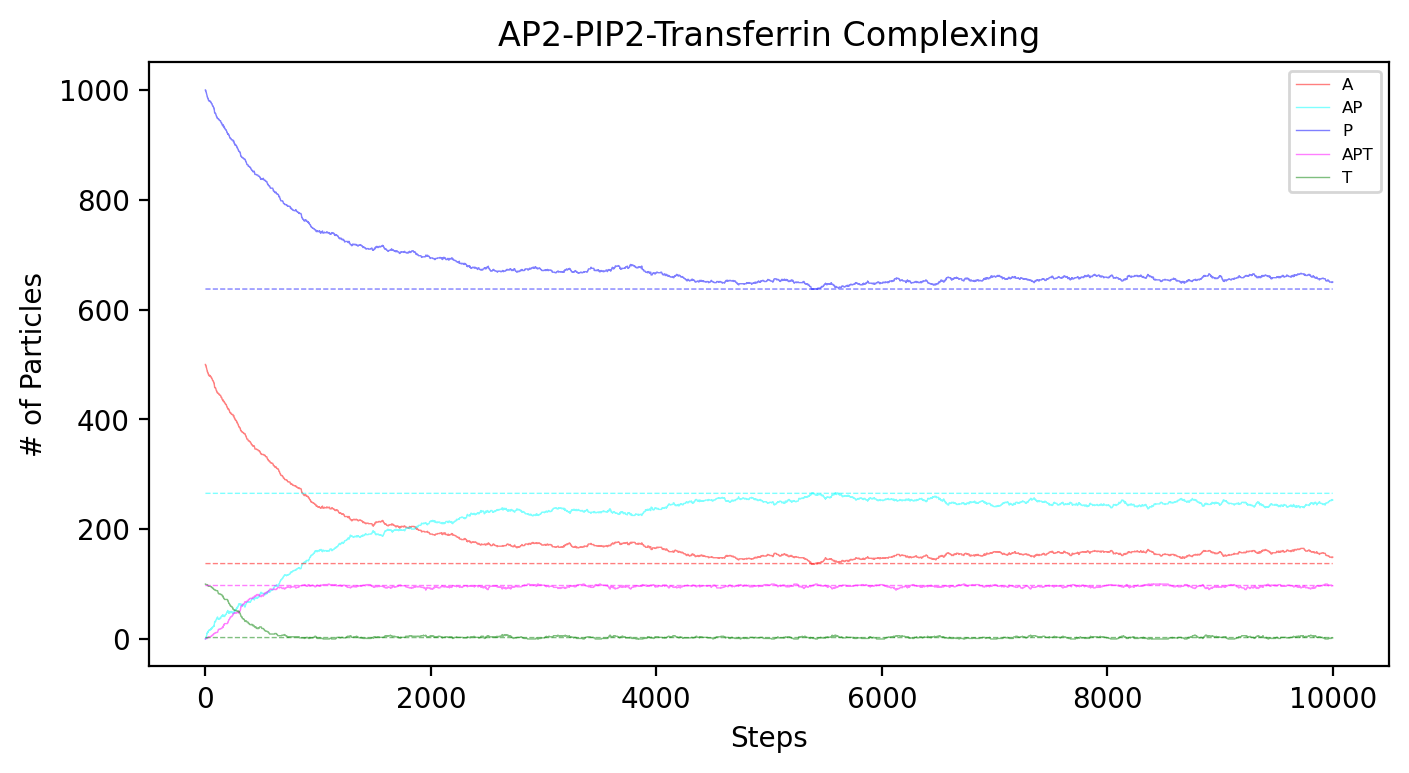

In [13]:
fig = plt.figure(figsize=(8,4),dpi=200)
ax = fig.add_subplot(111)
#ax.scatter(np.arange(step_n+1), path, c='blue',alpha=0.25,s=0.05);
ax.plot(A[:10001],c='red',alpha=0.5,lw=0.5,ls='-', label = 'A');
ax.plot(AP[:10001],c='cyan',alpha=0.5,lw=0.5,ls='-', label = 'AP');
ax.plot(P[:10001],c='blue',alpha=0.5,lw=0.5,ls='-', label = 'P');
ax.plot(APT[:10001],c='magenta',alpha=0.5,lw=0.5,ls='-', label = 'APT');
ax.plot(T[:10001],c='green',alpha=0.5,lw=0.5,ls='-', label = 'T');
ax.plot(A_calc,c='red',alpha=0.5,lw=0.5,ls='--');
ax.plot(P_calc,c='blue',alpha=0.5,lw=0.5,ls='--');
ax.plot(T_calc,c='green',alpha=0.5,lw=0.5,ls='--');
ax.plot(AP_calc,c='cyan',alpha=0.5,lw=0.5,ls='--');
ax.plot(APT_calc,c='magenta',alpha=0.5,lw=0.5,ls='--');

plt.title('AP2-PIP2-Transferrin Complexing')
plt.xlabel('Steps')
plt.ylabel('# of Particles')
#plt.tight_layout(pad=0)
plt.legend(loc = 'upper right', prop={'size': 6})
plt.savefig('./P_excess_copynumbers_zoom.png',dpi=250);